In [1]:
import numpy as np
from scipy.optimize import fsolve
from numpy import linalg
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
T=60
N=100
temps=[T*i/N for i in range(N+1)]

In [3]:
def SIR(x,t,alpha, beta):
    S,I,R=x
    dS = -beta*S*I
    dI = beta*S*I-alpha*I
    dR = alpha*I
    return (dS,dI,dR)

Paramètres + Solution

In [4]:
alpha = 0.5
beta = 0.2
x0 = [0.5,0.5,0.0]
Sol = odeint(SIR,x0,temps,args=(alpha,beta))
alpha2 = 0.1
beta2 = 0.3
Solb = odeint(SIR,x0,temps,args=(alpha2,beta2))

Point d'equilibre (coordonnées)

In [5]:
#point d'équilibre calculé à la main : (0,0,1)->trivial ou (0,a/b, |1-a/b|)
#ici, a/b = 0.4
xi= [.4,.0,.6]
sol = fsolve(SIR,xi, args=(temps,alpha,beta))
pt_eq = SIR(sol,temps,alpha,beta)
print('x=', sol)
print('f(x)=', pt_eq)
sol = sol/(np.sum(sol))
print(" normalisé", sol)

x= [0.4 0.  0.6]
f(x)= (-0.0, 0.0, 0.0)
 normalisé [0.4 0.  0.6]


Solution fonction pts d'équilibres

In [6]:
eq = odeint(SIR,sol,temps,args=(alpha,beta))

Graphe pt d'equilibre

(-0.05, 1.0)

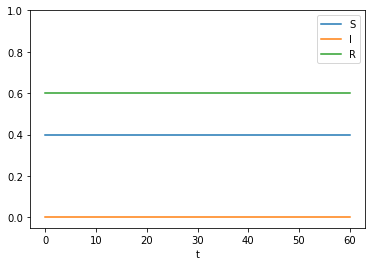

In [7]:
plt.plot(temps,eq)
plt.legend(['S','I','R'])
plt.xlabel('t')
plt.ylim((-0.05,1))

Modèlisation 

(-0.05, 1.0)

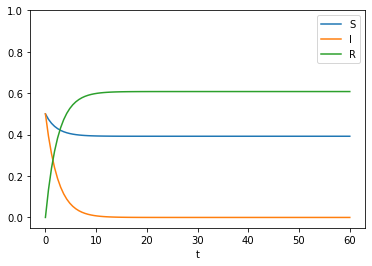

In [8]:
plt.plot(temps,Sol)
plt.legend(['S','I','R'])
plt.xlabel('t')
plt.ylim((-0.05,1))

Text(0.5, 0, 't')

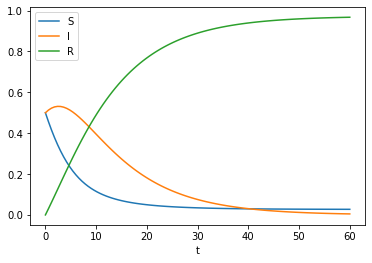

In [9]:
plt.plot(temps,Solb)
plt.legend(['S','I','R'])
plt.xlabel('t')

Nouvelles données initiales

In [10]:
x02 = [0.49,0.51,0.0]

Nouveaux points d'équilibres

In [11]:
sol = fsolve(SIR,x02, args=(temps,alpha,beta))
pt_eq = SIR(sol,temps,alpha,beta)
print('x=', sol)
print('f(x)=', pt_eq)
sol = sol/(np.sum(sol))
print("sol",sol)

x= [ 4.89999999e-01  0.00000000e+00 -4.65661285e-10]
f(x)= (-0.0, 0.0, 0.0)
sol [ 1.00000000e+00  0.00000000e+00 -9.50329157e-10]


In [12]:
eq = odeint(SIR,sol,temps,args=(alpha,beta))

Text(0.5, 0, 't')

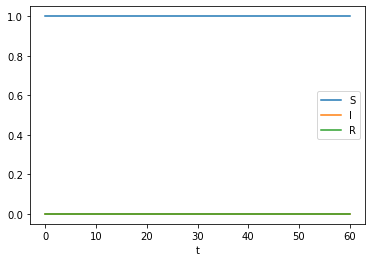

In [13]:
plt.plot(temps,eq)
plt.legend(['S','I','R'])
plt.xlabel('t')

In [14]:
Sol2 = odeint(SIR,x02,temps,args=(alpha,beta))

Text(0.5, 0, 't')

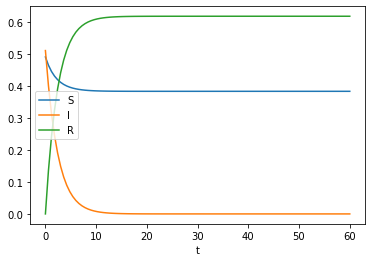

In [15]:
plt.plot(temps,Sol2)
plt.legend(['S','I','R'])
plt.xlabel('t')

In [16]:
x03 = [0.51,0.49,0.0]

In [17]:
sol = fsolve(SIR,x03, args=(temps,alpha,beta))
pt_eq = SIR(sol,temps,alpha,beta)
print('x=', sol)
print('f(x)=', pt_eq)
sol = sol/(np.sum(sol))
print("sol",sol)

x= [0.51 0.   0.  ]
f(x)= (-0.0, 0.0, 0.0)
sol [1. 0. 0.]


In [18]:
eq = odeint(SIR,sol,temps,args=(alpha,beta))

Text(0.5, 0, 't')

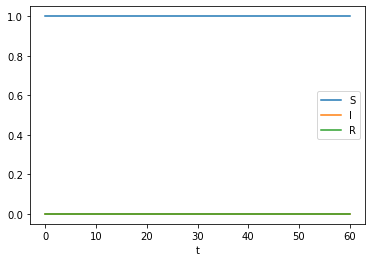

In [19]:
plt.plot(temps,eq)
plt.legend(['S','I','R'])
plt.xlabel('t')

In [20]:
Sol3 = odeint(SIR,x03,temps,args=(alpha,beta))

Text(0.5, 0, 't')

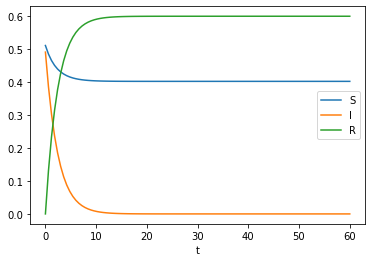

In [21]:
plt.plot(temps,Sol3)
plt.legend(['S','I','R'])
plt.xlabel('t')

Compartiment selon un autre 2D

Text(0, 0.5, 'R')

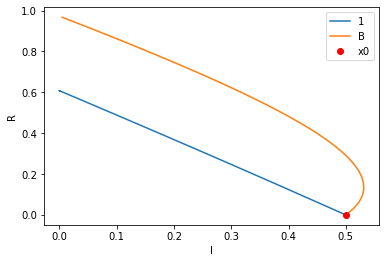

In [26]:
I = Sol[:,1]
Ib = Solb[:,1]
R = Sol[:,2]
Rb = Solb[:,2]
plt.plot(I,R,Ib,Rb,x0[1],x0[2],'or')
plt.legend(['1','B','x0'])
plt.xlabel('I')
plt.ylabel('R')

Text(0, 0.5, 'Infecté')

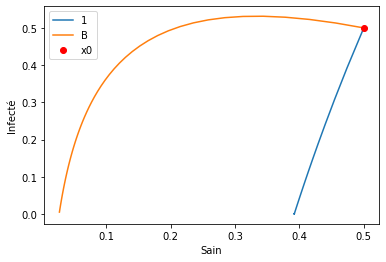

In [28]:
Sain = Sol[:,0]
Infecté = Sol[:,1]
Sb = Solb[:,0]
Ib = Solb[:,1]
plt.plot(Sain,Infecté,Sb,Ib,x0[0],x0[1],'or')
plt.legend(['1','B','x0'])
plt.xlabel('Sain')
plt.ylabel('Infecté')

Copartiments selon d'autres 3D

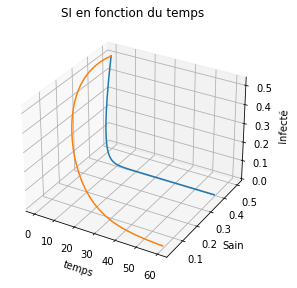

In [43]:
from mpl_toolkits.mplot3d import axes3d  


x = temps 
y =  Sol[:,0]  
z =  Sol[:,1]  
yb =  Solb[:,0]
zb = Solb[:,1]

fig = plt.figure()
ax = fig.gca(projection='3d')  
ax.plot(x, y, z, label='Courbe') 
ax.plot(x, yb, zb, label='Courbe')
plt.title("SI en fonction du temps")
ax.set_ylabel('Sain')
ax.set_zlabel('Infecté')
ax.set_xlabel('temps')
plt.tight_layout()
plt.show()

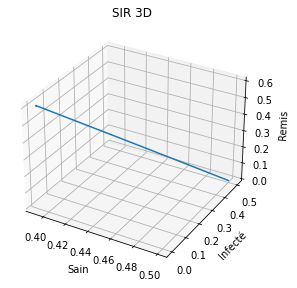

In [38]:
z =  Sol[:,2] 
x =  Sol[:,0]  
y =  Sol[:,1]  

fig = plt.figure()
ax = fig.gca(projection='3d')  
ax.plot(x, y, z, label='Courbe') 
plt.title("SIR 3D")
ax.set_xlabel('Sain')
ax.set_ylabel('Infecté')
ax.set_zlabel('Remis')
plt.tight_layout()
plt.show()

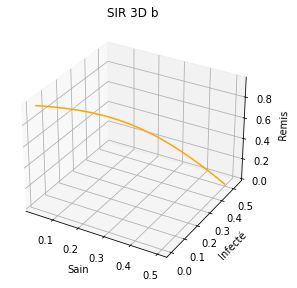

In [42]:
z =  Solb[:,2] 
x =  Solb[:,0]  
y =  Solb[:,1]  

fig = plt.figure()
ax = fig.gca(projection='3d')  
ax.plot(x, y, z, 'orange',label='Courbe') 
plt.title("SIR 3D b")
ax.set_xlabel('Sain')
ax.set_ylabel('Infecté')
ax.set_zlabel('Remis')
plt.tight_layout()
plt.show()

In [ ]:
def jac(x,t,a,b):
    "dS = -beta*S*I, dI = beta*S*I-alpha*I, dR = alpha*I"
    S,I,R=x
    A = np.zeros((3,3))
    A[0,0]= -b*I
    A[0,1]=-b*S
    A[0,2]=0
    A[1,0]=b*I
    A[1,1]=b*S-a
    A[1,2]=0
    A[2,0]=0
    A[2,1]=a
    A[2,2]=0
    return A

valeurs propres donnée 1

In [ ]:
A= jac(x0,temps,alpha, beta)

In [ ]:
E = linalg.eig(A)
E